In [9]:
#importamos las bibliotecas con las que voy a trabajar

import pandas as pd
import requests
from bs4 import BeautifulSoup, SoupStrainer

import random
import os

In [10]:
#función que lee el fichero de user agents (que previamente nos hemos descargado) y la función hace que elija uno aleatorio

def get_random_useragent():
    if os.path.exists('user-agents.txt'):
        with open('user-agents.txt', 'r') as f:
            lines = f.readlines()
            return str(random.choice(lines)).replace("\n", "")

In [11]:
# el header es la cabecera de la petición 'get' y contiene un user agent aleatorio para evitar posibles restricciones 

headers = {
    "User-Agent": get_random_useragent(),
    "X-Requested-With": "XMLHttpRequest"
}

req = requests.get("https://www.eitb.eus/es/tag/titulares-del-dia/", headers=headers, timeout=5)

In [12]:
#Introducimos la URL de dónde se recopila la información

html = BeautifulSoup(req.text, 'html.parser')
selection = html.select('div.contenido_tags > div')

clases_noticias = ["contenido_tag", "t_noticia", "t_video"]

df = pd.DataFrame(columns=['titular', 'descripcion', 'fecha', 'hora'])

#Se crea un bucle para que recorra todos los divs que contiene la información 

for element in selection:
    flag = True
    
    for clase in element.get("class"):
        if clase not in clases_noticias:
            flag = False
    
    if flag:
        fecha = element.select('div.texto_data > span.fecha_noticia')[0].text
        hora = element.select('div.texto_data > span.hora_noticia')[0].text
        titular = element.select('div.datos_contenido > h2.titulo > a')[0].text
        desc = element.select('div.datos_contenido > span.descripcion')[0].text
        
        df.loc[len(df)] = titular, desc, fecha, hora

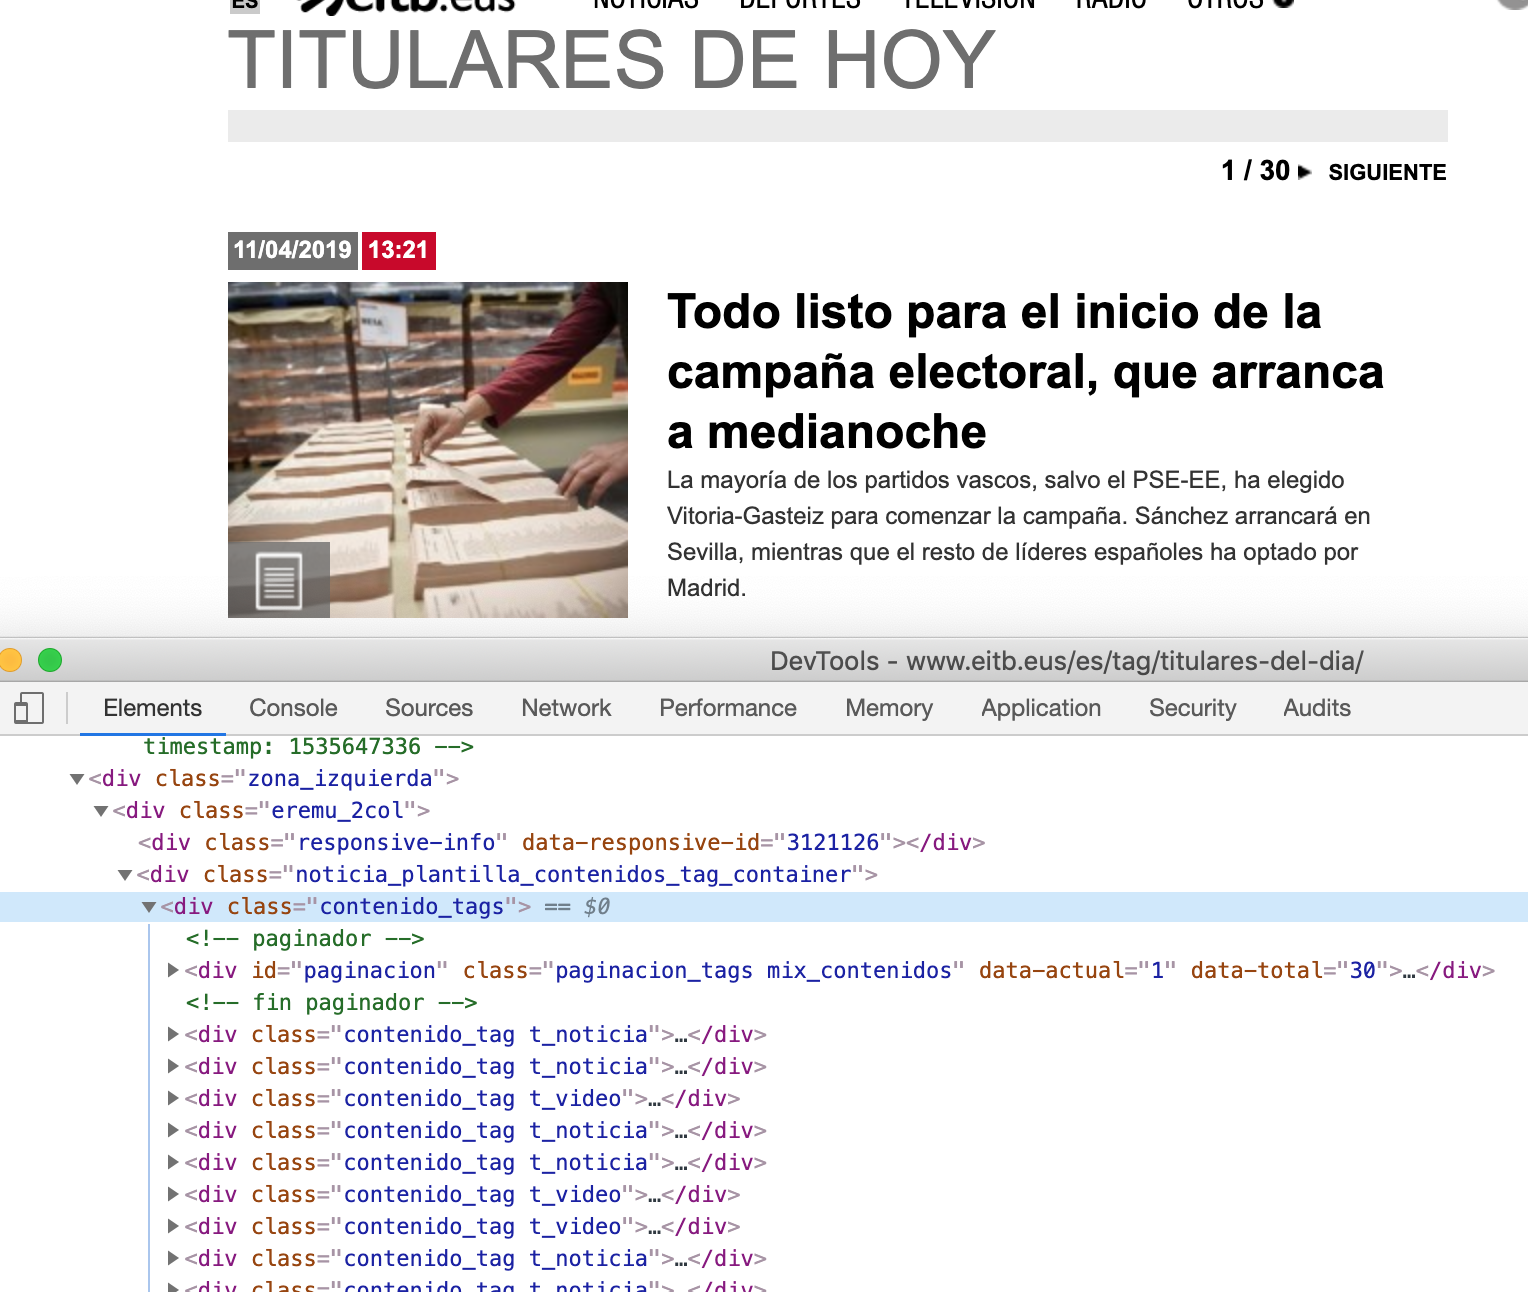

In [15]:
# Captura de pantalla de dónde se coge la información

from IPython.display import Image
Image("estructura_info_html.png")

In [13]:
df.head()

,titular,descripcion,fecha,hora
0,Presoen defentsarekin lotuta auzipetutako 47 l...,Fiskaltzak 8 eta 20 urte arteko espetxe zigorr...,11/04/2019,14:03
1,La Korrika recorre ya las calles de Bilbao,La vigesimoprimera edición de la carrera por e...,11/04/2019,13:19
2,La Korrika llega a Bilbao y recorrerá la ciuda...,La carrera a favor del euskera ha entrado por ...,11/04/2019,13:12
3,Korrika provocará cambios en el tráfico de San...,La ciudad recuperará la normalidad sobre las 2...,11/04/2019,12:57
4,El juicio a las 47 personas relacionadas con l...,La Fiscalía ha solicitado penas de entre 8 y 2...,11/04/2019,12:47


In [14]:
#Función para que abra el csv // no se hace con función open porque pandas automáticamente ya crea el fichero

df.to_csv('titulares.csv', sep =';')